In [2]:
import matplotlib.pyplot as plt
import networkx as nx

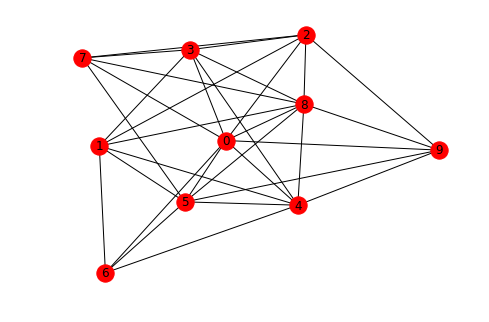

In [3]:
n = 10
p = 0.7
G = nx.gnp_random_graph(n, p, seed=93)
nx.draw(G, with_labels = True)
plt.show()

In [4]:
# Miary sieciowe

# stopień
print(nx.degree_centrality(G))
# bliskość
print(nx.closeness_centrality(G))
# pośrednictwo
print(nx.betweenness_centrality(G))
# pagerank
print(nx.pagerank(G))

{0: 0.8888888888888888, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.7777777777777777, 5: 0.7777777777777777, 6: 0.4444444444444444, 7: 0.5555555555555556, 8: 0.8888888888888888, 9: 0.5555555555555556}
{0: 0.9, 1: 0.75, 2: 0.75, 3: 0.75, 4: 0.8181818181818182, 5: 0.8181818181818182, 6: 0.6428571428571429, 7: 0.6923076923076923, 8: 0.9, 9: 0.6923076923076923}
{0: 0.09074074074074072, 1: 0.04675925925925925, 2: 0.0324074074074074, 3: 0.02407407407407407, 4: 0.04953703703703703, 5: 0.0625, 6: 0.004629629629629629, 7: 0.011111111111111112, 8: 0.056018518518518516, 9: 0.011111111111111112}
{0: 0.125682779619184, 1: 0.09759848704599473, 2: 0.09724825345266414, 3: 0.09681990982299056, 4: 0.1114909532903837, 5: 0.11179514185509688, 6: 0.06929345735751156, 7: 0.08268920456052786, 8: 0.12487064759070003, 9: 0.08251116540494646}


In [5]:
# Globalne miary sieciowe

# średnia z najkrótszych ścieżek
print(nx.average_shortest_path_length(G))
# średnica
print(nx.diameter(G))
# centralizacja stopni - Freeman centrality
degrees = [x[1] for x in G.degree]
max_delta = max([x[1] for x in G.degree])
freeman_centrality = sum([abs(x - max_delta) for x in degrees])/((len(degrees) - 1) * (len(degrees) - 2))
print(freeman_centrality)
# gęstość
print(nx.density(G))


1.3111111111111111
2
0.25
0.6888888888888889


In [6]:
from collections import OrderedDict

def compare(graph1, graph2):
    """
    Compare two graphs
    
    Args:
        graph1: First graph to compare
        graph2: Second graph to compare
    
    Returns:
        A dict with calculated diffrence measures
    """
    result = OrderedDict()
    # KS test for graph measurements distributions
    graph1_degree_centrality = list(nx.degree_centrality(graph1).values())
    graph2_degree_centrality = list(nx.degree_centrality(graph2).values())
    result['degree_centrality'] = stats.ks_2samp(graph1_degree_centrality, graph2_degree_centrality)
    
    graph1_closeness_centrality = list(nx.closeness_centrality(graph1).values())
    graph2_closeness_centrality = list(nx.closeness_centrality(graph2).values())
    result['closeness_centrality'] = stats.ks_2samp(graph1_closeness_centrality, graph2_closeness_centrality)
    
    graph1_betweenness_centrality = list(nx.betweenness_centrality(graph1).values())
    graph2_betweenness_centrality = list(nx.betweenness_centrality(graph2).values())
    result['betweenness_centrality'] = stats.ks_2samp(graph1_betweenness_centrality, graph2_betweenness_centrality)
    
    graph1_pagerank = list(nx.pagerank(graph1).values())
    graph2_pagerank = list(nx.pagerank(graph2).values())
    result['pagerank'] = stats.ks_2samp(graph1_pagerank, graph2_pagerank)
    
    # absolute value of global graph measurements subtraction
    result['average_shortest_path_length'] = abs(nx.average_shortest_path_length(graph1) - nx.average_shortest_path_length(graph2))
    result['diameter'] = abs(nx.diameter(graph1) - nx.diameter(graph2))
    result['degree_centrailty'] = '?'
    result['density'] = abs(nx.density(graph1) - nx.density(graph2))
    
    return result

In [7]:
from scipy import stats

n1, p1 = 10, 0.8
n2, p2 = 10, 0.5

graph1 = nx.gnp_random_graph(n1, p1, seed=93)
graph2 = nx.gnp_random_graph(n2, p2, seed=95)

compare(graph1, graph2)

OrderedDict([('degree_centrality',
              Ks_2sampResult(statistic=0.60000000000000009, pvalue=0.031046781145641307)),
             ('closeness_centrality',
              Ks_2sampResult(statistic=0.60000000000000009, pvalue=0.031046781145641307)),
             ('betweenness_centrality',
              Ks_2sampResult(statistic=0.30000000000000004, pvalue=0.67507815371659508)),
             ('pagerank',
              Ks_2sampResult(statistic=0.20000000000000007, pvalue=0.97478924654099508)),
             ('average_shortest_path_length', 0.24444444444444446),
             ('diameter', 0),
             ('degree_centrailty', '?'),
             ('density', 0.24444444444444446)])

In [9]:
"""
- weź wierzchołek
- policz mu cechy
    - stopień
    - pośrednictwo
    - bliskość
    - pagerank
    
- zrób z tego zbiór uczący
- zbuduj prostą dwuwarstwową sieć neuronową
- naucz sieć na zbiorze
- odpowiedź sieci + priority rank -> nowy graf
- porównaj wygenerowany graf z oryginalnym 
    - wynik porównania - funkcja kosztu sieci neuronowej
"""

'\n- weź wierzchołek\n- policz mu cechy\n    - stopień\n    - pośrednictwo\n    - bliskość\n    - pagerank\n    \n- zrób z tego zbiór uczący\n- zbuduj prostą dwuwarstwową sieć neuronową\n- naucz sieć na zbiorze\n- odpowiedź sieci + priority rank -> nowy graf\n- porównaj wygenerowany graf z oryginalnym \n    - wynik porównania - funkcja kosztu sieci neuronowej\n'

In [9]:
# attach attributes to the node
def attach_attributes(graph):
    degree_centralities = nx.degree_centrality(graph)
    betweenness_centralities = nx.betweenness_centrality(graph)
    closeness_centralities = nx.closeness_centrality(graph)
    pageranks = nx.pagerank(graph)

    for node_id in graph.nodes:
        node_attributes = {
            'degree_centrality': degree_centralities[node_id],
            'betweenness_centrality': betweenness_centralities[node_id],
            'closeness_centrality': closeness_centralities[node_id],
            'pagerank': pageranks[node_id]
        }
        graph.node[node_id].update(node_attributes)

In [10]:
attach_attributes(graph1)

In [11]:
graph1.nodes(data=True)

NodeDataView({0: {'degree_centrality': 0.8888888888888888, 'betweenness_centrality': 0.06507936507936508, 'closeness_centrality': 0.9, 'pagerank': 0.11598102726055617}, 1: {'degree_centrality': 0.7777777777777777, 'betweenness_centrality': 0.03869047619047618, 'closeness_centrality': 0.8181818181818182, 'pagerank': 0.10294403977772097}, 2: {'degree_centrality': 0.7777777777777777, 'betweenness_centrality': 0.02804232804232804, 'closeness_centrality': 0.8181818181818182, 'pagerank': 0.1023552334751838}, 3: {'degree_centrality': 0.7777777777777777, 'betweenness_centrality': 0.020436507936507933, 'closeness_centrality': 0.8181818181818182, 'pagerank': 0.10209888011897106}, 4: {'degree_centrality': 0.8888888888888888, 'betweenness_centrality': 0.042658730158730146, 'closeness_centrality': 0.9, 'pagerank': 0.11549581103188503}, 5: {'degree_centrality': 0.8888888888888888, 'betweenness_centrality': 0.06276455026455026, 'closeness_centrality': 0.9, 'pagerank': 0.11604555765789243}, 6: {'degre

In [12]:
def get_attributes(node_attributes, prefix):
    attributes_dict = {
        prefix + key: value
        for key, value in node_attributes
    }
    return attributes_dict


def graph_to_training_set(graph):
    adj_matrix = nx.adjacency_matrix(graph)
    idxs = range(adj_matrix.shape[0])
    rows = []
    for node1_id in idxs:
        attrs1 = get_attributes(graph.node[node1_id].items(), 'node1_')
        for node2_id in idxs:
            attrs2 = get_attributes(graph.node[node2_id].items(), 'node2_')
            row = {
                #'node1': node1_id,
                #'node2': node2_id,
                'num_of_conn': adj_matrix[node1_id, node2_id]
            }
            row.update(attrs1)
            row.update(attrs2)
            rows.append(row)
    return rows

In [15]:
import pandas as pd

graph1_rows = graph_to_training_set(graph1)
df = pd.DataFrame(graph1_rows)
X_train = df.iloc[:, :8]
y_train = df.iloc[:, 8]

In [16]:
from keras.models import Sequential
from keras.layers import Dense

# TODO: 
# katz_centrality
# moga byc tez inne wlasnosci wierzcholka
model = Sequential()
# input - all node attributes -> output probability of connection
model.add(Dense(units=8, input_dim=8, activation='relu'))
model.add(Dense(units=1))

# TODO: loss - crossentropy (log loss)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Using TensorFlow backend.
/home/smoq/.virtualenvs/cna/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Epoch 1/100
100/100 [==============================] - 0s 973us/step - loss: 3.8121 - acc: 0.3200
Epoch 2/100
100/100 [==============================] - 0s 42us/step - loss: 3.2063 - acc: 0.3200
Epoch 3/100
100/100 [==============================] - 0s 41us/step - loss: 2.6656 - acc: 0.3200
Epoch 4/100
100/100 [==============================] - 0s 44us/step - loss: 1.8938 - acc: 0.3200
Epoch 5/100
100/100 [==============================] - 0s 39us/step - loss: 1.4097 - acc: 0.3200
Epoch 6/100
100/100 [==============================] - 0s 36us/step - loss: 1.1412 - acc: 0.3200
Epoch 7/100
100/100 [==============================] - 0s 40us/step - loss: 1.0479 - acc: 0.3200
Epoch 8/100
100/100 [==============================] - 0s 34us/step - loss: 0.9830 - acc: 0.3200
Epoch 9/100
100/100 [==============================] - 0s 50us/step - loss: 0.9307 - acc: 0.3200
Epoch 10/100
100/100 [==============================] - 0s 41us/step - loss: 0.8943 - acc: 0.3200
Epoch 11/100
100/100 [======

100/100 [==============================] - 0s 36us/step - loss: 0.5762 - acc: 0.7200
Epoch 85/100
100/100 [==============================] - 0s 43us/step - loss: 0.5763 - acc: 0.7300
Epoch 86/100
100/100 [==============================] - 0s 37us/step - loss: 0.5762 - acc: 0.7300
Epoch 87/100
100/100 [==============================] - 0s 37us/step - loss: 0.5762 - acc: 0.7200
Epoch 88/100
100/100 [==============================] - 0s 50us/step - loss: 0.5765 - acc: 0.7200
Epoch 89/100
100/100 [==============================] - 0s 39us/step - loss: 0.5766 - acc: 0.7100
Epoch 90/100
100/100 [==============================] - 0s 55us/step - loss: 0.5766 - acc: 0.7100
Epoch 91/100
100/100 [==============================] - 0s 42us/step - loss: 0.5764 - acc: 0.7200
Epoch 92/100
100/100 [==============================] - 0s 37us/step - loss: 0.5766 - acc: 0.7100
Epoch 93/100
100/100 [==============================] - 0s 49us/step - loss: 0.5764 - acc: 0.7100
Epoch 94/100
100/100 [===========

In [17]:
# NEW
import numpy as np
import pandas as pd
import networkx as nx

# utwórz pusty graf zawierający tyle samo wierzchołków co graf początkowy
new_graph = nx.empty_graph(n=graph1.number_of_nodes())

# ustal liczbę krawędzi tworzonych przez każdy wierzchołek
num_edges = 3

node_similarities = {}

for u in graph1.nodes:
    # słownik zawierający, dla każdego wierzchołka, listę rankingową pozostałych wierzchołków
    node_similarities[u] = []

for v in graph1.nodes:

    # pobierz cechy obu wierzchołków w parze
    d = {}
    d.update(get_attributes(graph1.nodes[u].items(),'node1_'))
    d.update(get_attributes(graph1.nodes[v].items(),'node2_'))

    # zamień cechy obu wierzchołków na format akceptowalny przez keras
    feature_values = pd.DataFrame([d], columns=d.keys())

    # dodaj do słownika wynikowego pary (wierzchołek, prawdopodobieństwo istnienia krawędzi)
    node_similarities[u].append((v,model.predict(feature_values)[0][0]))

# n-ta liczba harmoniczna (str. 4 artykułu o priority rank), suma 1/1+1/2+1/3+...+1/n
h_n = sum([1/k for k in range(1,graph1.number_of_nodes()+1)])

for u in graph1.nodes:
    # dla każdego wierzchołka posortuj pozostałe wierzchołki w malejącym porządku prawdopodobieństwa krawędzi
    ranking = [n for (n, sim) in sorted(node_similarities[u], key=lambda x: x[1], reverse=True)]

    # wylicz prawdopodobieństwo utworzenia krawędzi do wierzchołka na danej pozycji rankingu
    # wzór 1 na str.4 artykułu o priority rank
    prob = [1/(idx * h_n) for idx, elem in enumerate(ranking, start=1)]

    # wylosuj k wierzhołków do których bieżący wierzchołek u tworzy krawędzie
    target_nodes = np.random.choice(ranking, size=num_edges, replace=False, p=prob)

    # dodaj krawędzie w generowanym grafie
    for tn in target_nodes:
        new_graph.add_edge(u, tn)

print(nx.adj_matrix(new_graph).todense())

ValueError: a must be non-empty